# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [150]:
data = pd.read_csv(
    "data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


В наших данных 541909 строк и 8 признаков, 2 числовых, 5 категориальных и 1 признак даты (типа object), который следует перевести в формат даты.  

In [151]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [152]:
# статистический анализ исходных данных, основные диапазоны исходных признаков.
print(data.describe())
print('Уникальных клиентов: {}'.format( data.CustomerID.nunique()))
print('Страны проживания клиентов: ', data.Country.value_counts().index, 'Всего стран: ', data.Country.nunique())
print('Кол-во пропусков в признаках:', '\n', data.isna().mean()*100)
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))


            Quantity                    InvoiceDate      UnitPrice
count  541909.000000                         541909  541909.000000
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 11:34:00       1.250000
50%         3.000000            2011-07-19 17:17:00       2.080000
75%        10.000000            2011-10-19 11:27:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       218.081158                            NaN      96.759853
Уникальных клиентов: 4372
Страны проживания клиентов:  Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Unspecified',
       'Austria', 'Denmark', 'Japan', 'Poland', 'Israel', 'USA', 'Hong Kong',
       'Singapore', 'Iceland', 'Canad

Статистические характеристики основных признаков демонстрируют, что
1. транзакции совершались в период с 01.12.2010г по 09.12.2011г.
2. по медиане кол-во товаров за транзакцию равняется 3, а в основном находится в пределах от 1 до 10. Имеются крайне неестественные значения (выбросы), одинаковые по величине, но с разным знаком (предположительно, ошибочный заказ и возврат).
3. цена за единицу товара в основном в пределах 1,25-4,13 фунтов стерлингов, также имеются аномальные значения.

В данных информация о 4372 клиентах из 38 стран. При этом мы видим, что почти четверть информации о клиентах (24,96%) отсутствует. Пропуски есть и в столбце Description (описание товара). Кроме того в данных имеется 5268 дубликата.

## 2. <a name='clean'>Преобразование, очистка и анализ данных</a>

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [153]:
data = data.dropna(subset=['CustomerID'])


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [154]:
data = data.drop_duplicates()

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [155]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()
# добавляем признак-мигалку, "1", если транзакция является возвратом, "0" в обратном случае
nb_products_per_basket['chargeback'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if x.startswith('C') else 0)
nb_products_per_basket['chargeback'].value_counts(normalize=True)

chargeback
0    0.835331
1    0.164669
Name: proportion, dtype: float64

**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

In [156]:
# создадим датасет только с возвратами
data_cb = data[data['InvoiceNo'].str.contains('^C', regex=True)]
# и без возвратов
data_c = data[~data['InvoiceNo'].str.contains('^C', regex=True)]
# объединим их
data_merged = data_c.merge(data_cb,
                           how='left', 
                           on=['CustomerID', 'StockCode', 'InvoiceDate', 
                               'Country', 'Description', 'UnitPrice'],  
                           suffixes=('_c', 'Canceled')) 
# заполним образовавшиеся пропуски нулями
data_merged = data_merged.fillna(0)
data_merged.shape

(392732, 10)

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [157]:
data = data_merged[~data_merged['StockCode'].str.contains('^[a-zA-Z]+')]
data.shape

(391183, 10)

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [158]:
data = data[data['UnitPrice'] > 0]

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [159]:
data['TotalPrice'] = data['UnitPrice']*(data['Quantity_c']+data['QuantityCanceled'])
print(data['TotalPrice'].describe())


count    391150.000000
mean         22.335546
std         310.931952
min           0.000000
25%           4.950000
50%          11.900000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64


После преобразований в данных осталось 391150 строк и 11 признаков: 'InvoiceNo_c' и 'Quantity_c' - это номер счет-фактуры и кол-во товара в заказе, а 'InvoiceNoCanceled' и 'QuantityCanceled'  - при возврате. 'TotalPrice' - общая цена заказа.

In [160]:
# сохраняем очищенные датасет в файл, чтобы не повторять все действия
data.to_csv('data/data_cleaned.csv', encoding="ISO-8859-1", index=False)

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



Text(0.5, 1.0, 'по приносимой выручке')

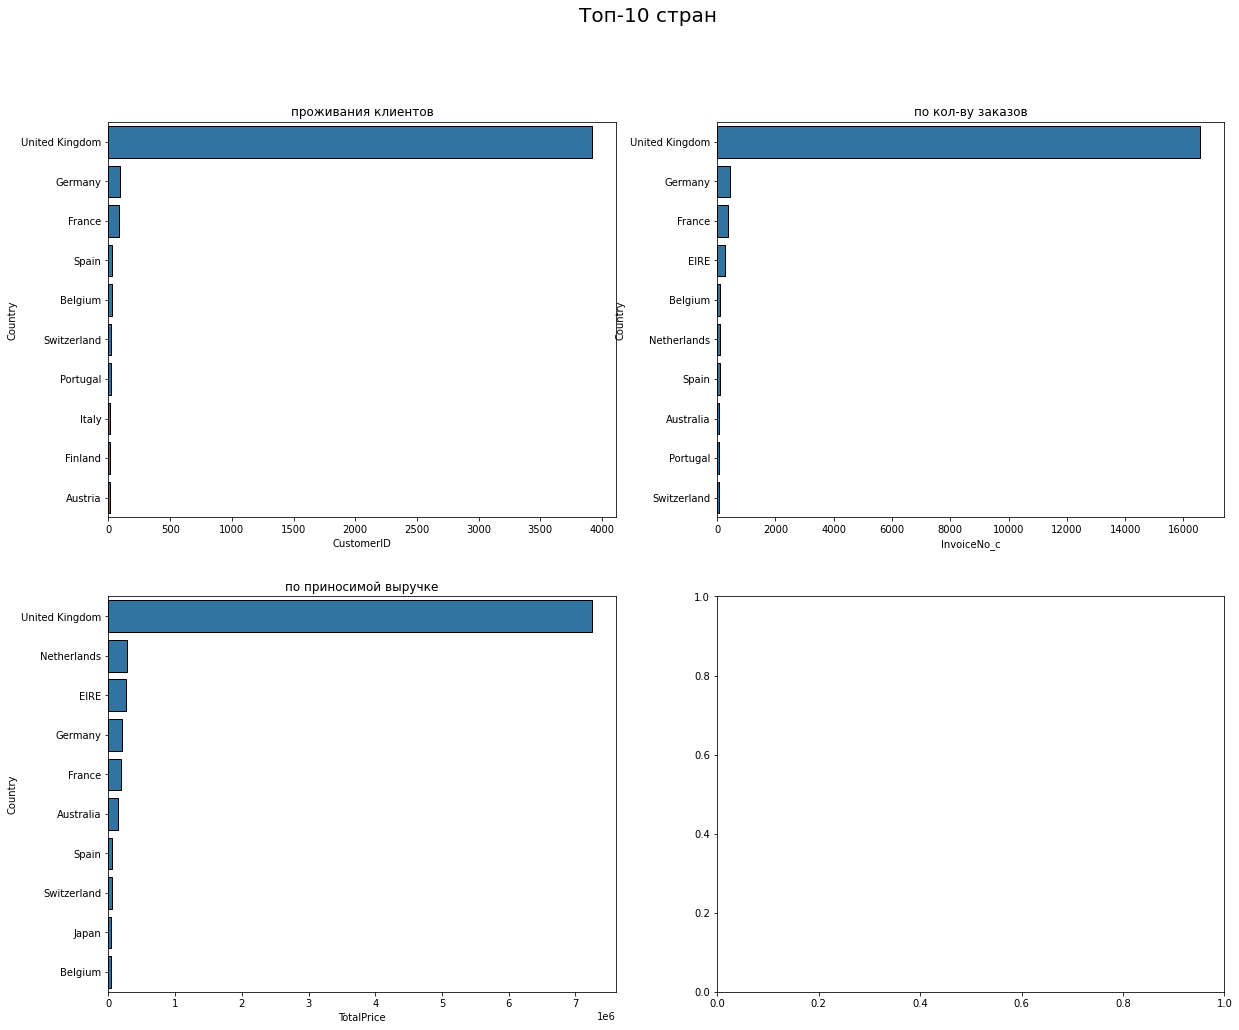

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16)) #, sharey=True
fig.suptitle('Топ-10 стран', fontsize=20)

# по проживанию клиентов
sns.barplot(data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).nlargest(10),
            orient='h',
            ax=axes[0][0]
            )
axes[0][0].set_title('проживания клиентов')

# по кол-ву заказов
sns.barplot( 
            data.groupby('Country')['InvoiceNo_c'].nunique().sort_values(ascending=False).nlargest(10),
            orient='h',
            ax=axes[0][1]
            )
axes[0][1].set_title('по кол-ву заказов')

# по выручке
sns.barplot(
            data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).nlargest(10),
            orient='h',
            ax=axes[1][0], 
            )
axes[1][0].set_title('по приносимой выручке')

Очевидно, что основным источником прибыли является Великобритания - она лидирует по всем трем показателям. 

<Axes: xlabel='Month', ylabel='TotalPrice'>

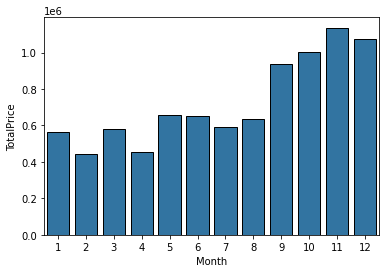

In [162]:
# чтобы проверить сезонность выручки, добавим сезонные признаки (месяц, день недели, час) в датасет
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour
data['Date'] = data['InvoiceDate'].dt.date
sns.barplot(data.groupby('Month')['TotalPrice'].sum())

График показывает, что больше всего выручки приходится на ноябрь. Самые прибыльные месяцы - с сентября по декабрь. 

Text(0.5, 1.0, 'Выручка по дням недели')

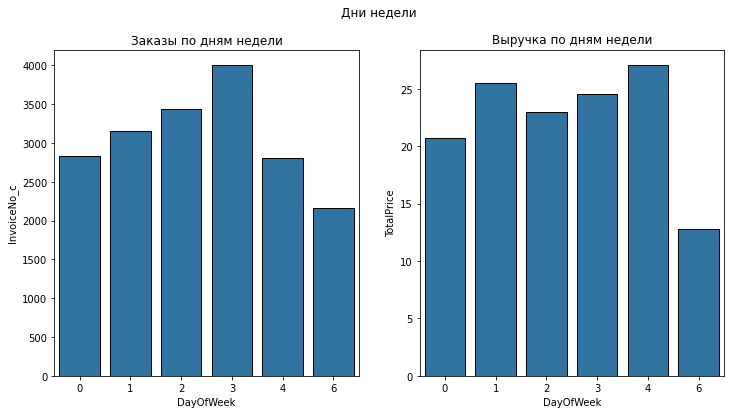

In [163]:
# проверим зависит ли кол-во заказов и выручка от дня недели
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
fig.suptitle('Дни недели')
sns.barplot(data.groupby('DayOfWeek')['InvoiceNo_c'].nunique(),
            ax=axes[0])
axes[0].set_title('Заказы по дням недели')

sns.barplot(data.groupby('DayOfWeek')['TotalPrice'].mean(),
            ax=axes[1])
axes[1].set_title('Выручка по дням недели')


Больше всего заказов приходится на среду, вторник и понедельник. 
Неожиданно, но больше всего выручки приходится на четверг (4) и понедельник (1). При этом в пятницу нет ни выручки, ни заказов.

<Axes: xlabel='Hour', ylabel='Count'>

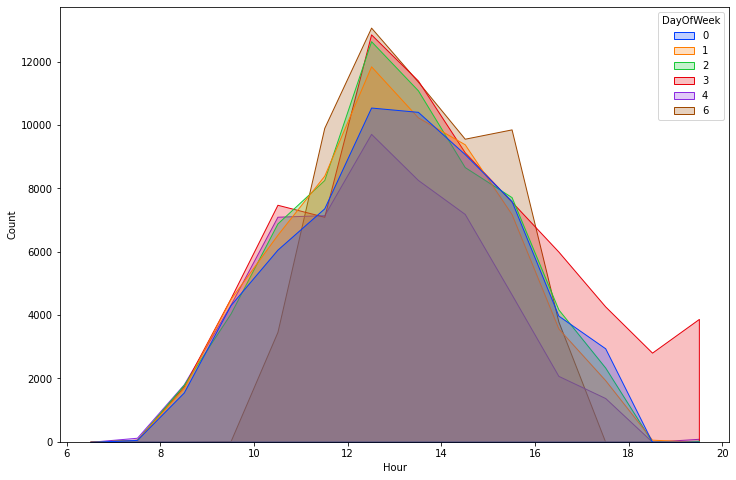

In [164]:
# Взглянем на распределение заказов по дням недели и времени суток
temp_2 = data[['InvoiceNo_c', 'DayOfWeek', 'Hour']]
fig = plt.figure(figsize=(12, 8))
sns.histplot(temp_2, x='Hour', hue='DayOfWeek', binwidth=1, palette='bright',  element="poly") 

Большинство заказов приходится на 12-15 часов дня, причем пик заказов приходится на субботу, среду и вторник. Нет заказов в период с 8 часов вечера до 6 часов утра. (это тоже интересно, ведь по логике онлайн-магазин не закрывается на ночь)

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [165]:
# переводим признак 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])
# для удобства даем названия временным функциям
get_recency = lambda x: (pd.to_datetime('2011-12-10 ') - x.max()).days
get_recency.__name__ = 'Recency'
get_frequency = lambda x: len(x.unique())
get_frequency.__name__ = 'Frequency'
# создаем RFM-таблицу
rfm_table = data.groupby('CustomerID').agg({'Date': [get_recency], 'InvoiceNo_c': [get_frequency], 'TotalPrice': 'sum'})  
# убираем мультииндексные названия столбцов и переименовываем столбец sum
rfm_table.columns = [tup[1] if tup[1] else tup[0] for tup in rfm_table.columns]
rfm_table = rfm_table.rename(columns={'sum': 'Monetary_Value'})
rfm_table

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,326,1,77183.60
12347,3,7,4310.00
12348,76,4,1437.24
12349,19,1,1457.55
12350,311,1,294.40
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,2,178.05


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [166]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [167]:
# оставляем значения не выше квантили 0,95
freq_95 = rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(q=0.95)
monet_95 = rfm_table['Monetary_Value'] <= rfm_table['Monetary_Value'].quantile(q=0.95)
rfm_table = rfm_table[freq_95&monet_95]
rfm_table.describe()

,Recency,Frequency,Monetary_Value
count,4044.000000,4044.000000,4044.000000
mean,98.412957,3.015331,997.975690
std,101.116481,2.546770,1048.751237
min,1.000000,1.000000,3.750000
25%,22.000000,1.000000,289.675000
50%,57.000000,2.000000,603.585000
75%,156.000000,4.000000,1339.667500
max,374.000000,13.000000,5732.930000


In [168]:
# строим ящики на обновленных данных
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Теперь признаки выглядят более естественно и логично.

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [169]:
# импортируем нужные классы
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

#### Понижение размерности с помощью PCA

Доля дисперсии, которую объясняет главная компонента: 0.68


<Axes: xlabel='axis-1', ylabel='axis-2'>

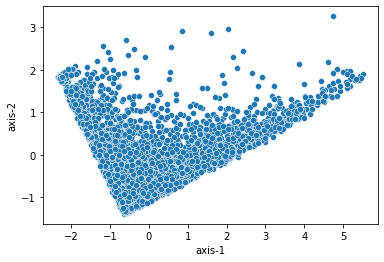

In [170]:
# инициализируем пайплайн, в котором сначала стандартизируем данные, 
# а потом понижаем их размерность с помощью PCA c 2мя компонентами
pipeline_pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
rfm_table_pca = pipeline_pca.fit_transform(rfm_table)
print('Доля дисперсии, которую объясняет главная компонента: {:.2f}'.format(pipeline_pca[1].explained_variance_ratio_[0]))
rfm_table_pca = pd.DataFrame(rfm_table_pca, columns=['axis-1', 'axis-2'])

# пробуем визуализировать пространство главных компонент
sns.scatterplot(data=rfm_table_pca, x='axis-1', y='axis-2')

На графике нельзя выделить какие-либо кластеры.

#### Понижение размерности с помощью t_SNE

<Axes: xlabel='axis-1', ylabel='axis-2'>

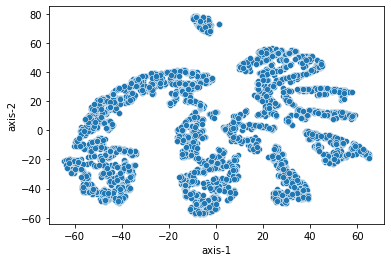

In [171]:
pipeline_tsne = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2))])
rfm_table_tsne = pipeline_tsne.fit_transform(rfm_table)
rfm_table_tsne = pd.DataFrame(rfm_table_tsne, columns=['axis-1', 'axis-2'])
# пробуем визуализировать пространство главных компонент
sns.scatterplot(data=rfm_table_tsne, x='axis-1', y='axis-2')

Очевидно, что нам подходит метод t-SNE, с которым данные разделились на видимые кластеры.

#### 3.1.1 Кластеризация с помощью K-means

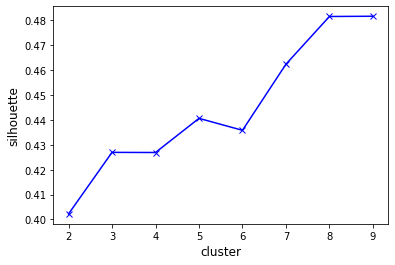

In [172]:
# применим метод силуэта, чтобы узнать оптимальное кол-во кластеров
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette

from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(3, 11):
    silhouettes.append(get_silhouette(i , rfm_table_tsne))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [173]:
# реализуем  k-means с оптимальным количеством кластеров 
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(rfm_table_tsne)
print('Коэф-т силуэта для kmeans: {:.2f}'.format(silhouette_score(rfm_table_tsne, kmeans.labels_, metric='euclidean')))
rfm_table_tsne['label_km'] = kmeans.labels_

Коэф-т силуэта для kmeans: 0.46


#### 3.1.2. Кластеризация с помощью EM-алгоритма

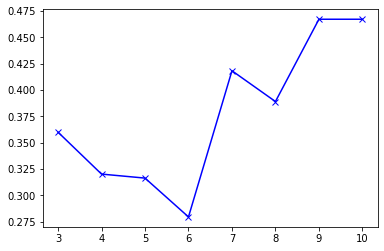

In [174]:

# подбираем кол-во кластеров
silhouette_em = []
 
for i in range(3,11):
    model_gm = GaussianMixture(n_components=i, random_state=42)
    predictions = model_gm.fit_predict(rfm_table_tsne)
    # print(np.unique(predictions, return_counts=True))
    sil_score = silhouette_score(rfm_table_tsne, predictions, metric='euclidean')
    silhouette_em.append((i, sil_score))
               
df_em = pd.DataFrame(silhouette_em, columns=['cluster', 'sil_score'])
plt.plot(df_em['cluster'], df_em['sil_score'], 'xb-') 

In [175]:
# реализуем кластеризацию с помощью ЕМ-алгоритма
model = GaussianMixture(n_components=9, random_state=42)
predictions = model.fit_predict(rfm_table_tsne)
# np.unique(predictions, return_counts=True)
print('Коэф-т силуэта для ЕМ-алгоритма: {:.2f}'.format(silhouette_score(rfm_table_tsne, predictions, metric='euclidean')))
rfm_table_tsne['labels_em'] = predictions

Коэф-т силуэта для ЕМ-алгоритма: 0.47


#### 3.1.3. Кластеризация с помощью аггломеративной иерархической кластеризации

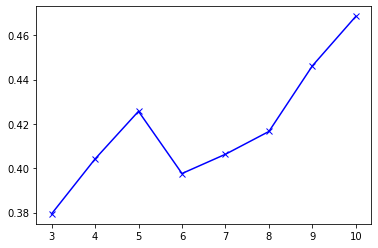

In [176]:
# подбираем кол-во кластеров
siliuette_list_hierarchical = []
 
for i in range(3,11):
        agglomerative = AgglomerativeClustering(affinity='euclidean',n_clusters=i).fit_predict(rfm_table_tsne)
        sil_score = silhouette_score(rfm_table_tsne, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((i, sil_score))
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score'])
#df_hierarchical.sort_values(by ='sil_score')
plt.plot(df_hierarchical['cluster'], df_hierarchical['sil_score'], 'xb-')

In [177]:
agg_cl = AgglomerativeClustering(affinity='euclidean', n_clusters=10).fit(rfm_table_tsne)
rfm_table_tsne['agg_cl_labels'] = agg_cl.labels_
print('Коэф-т силуэта для AgglomerativeClustering: {:.2f}'.format(silhouette_score(rfm_table_tsne, agg_cl.labels_)))

Коэф-т силуэта для AgglomerativeClustering: 0.47


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Для ЕМ-алгоритма и иерархической кластеризации коэффициенты силуэта равны - 0,47. Kmeans дает коэффициент чуть меньше - 0,46. Попробуем взглянуть на визуализацию.

Text(0.5, 1.0, 'Кластеризация методом аггломеративной иерархической кластеризации')

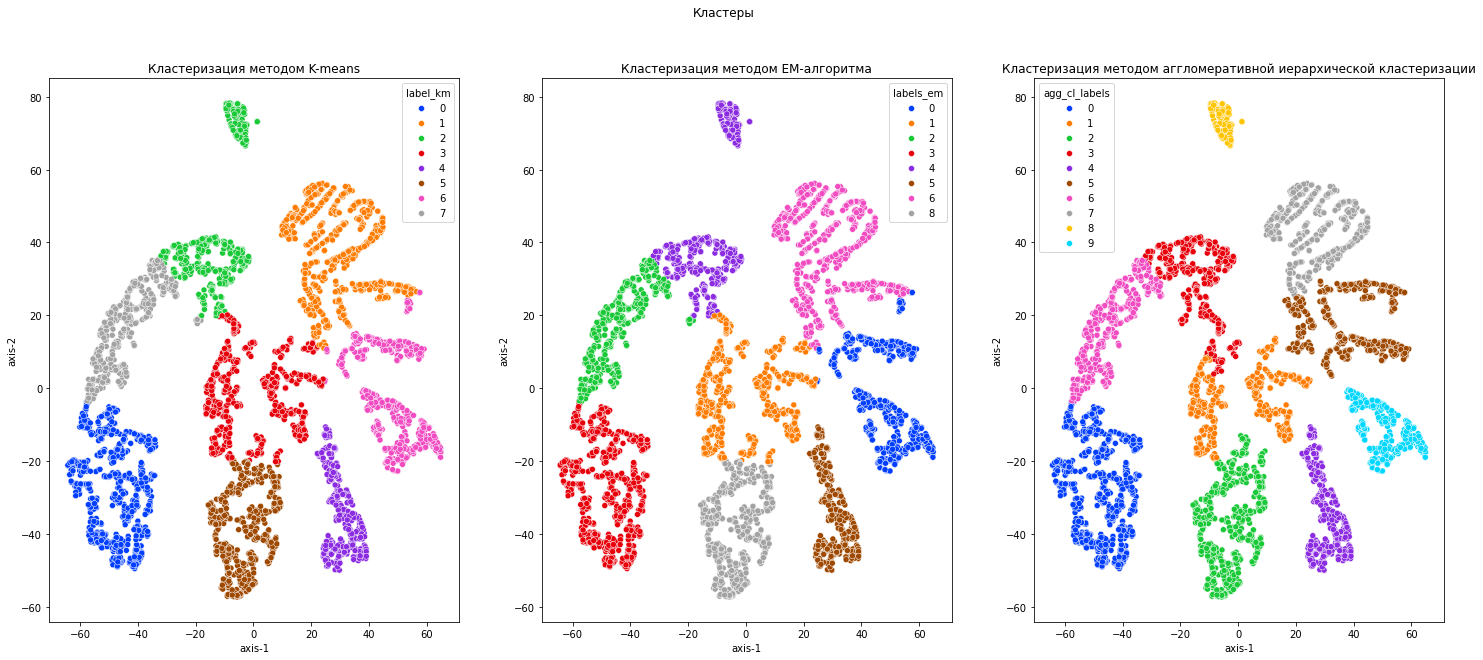

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10)) 
fig.suptitle('Кластеры')

sns.scatterplot(data=rfm_table_tsne, x='axis-1', y='axis-2', hue='label_km', palette='bright',
            ax=axes[0])
axes[0].set_title('Кластеризация методом K-means')

sns.scatterplot(data=rfm_table_tsne, x='axis-1', y='axis-2', hue='labels_em', palette='bright',
            ax=axes[1])
axes[1].set_title('Кластеризация методом ЕМ-алгоритма')

sns.scatterplot(data=rfm_table_tsne, x='axis-1', y='axis-2', hue='agg_cl_labels', palette='bright',
            ax=axes[2])
axes[2].set_title('Кластеризация методом аггломеративной иерархической кластеризации')


А по графикам кажется, что иерархическая кластеризация сработала лучше, так как отдельно отстоящий фрагмент выделен в отдельный кластер только на отдельном графике. Поэтому в дальнейшем будем использовать модель агломеративной иерархической кластеризации.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.


In [179]:
# с tsne и аггломерацией
rfm_table_agg = rfm_table.copy()
rfm_table_agg['agg_labels'] = agg_cl.labels_
grouped_data_agg = rfm_table_agg.groupby('agg_labels')[['Recency', 'Frequency', 'Monetary_Value']].mean().round()
print(grouped_data_agg)
print(rfm_table_agg['agg_labels'].value_counts().sort_index())

            Recency  Frequency  Monetary_Value
agg_labels                                    
0              47.0        1.0           329.0
1             157.0        3.0           753.0
2              41.0        2.0           652.0
3             289.0        1.0           413.0
4              32.0        3.0           932.0
5              42.0        5.0          1994.0
6             180.0        1.0           275.0
7              24.0        9.0          2904.0
8             366.0        1.0           238.0
9              37.0        4.0          1069.0
agg_labels
0    648
1    409
2    533
3    402
4    325
5    448
6    402
7    464
8    114
9    299
Name: count, dtype: int64


Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [180]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show('png')

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

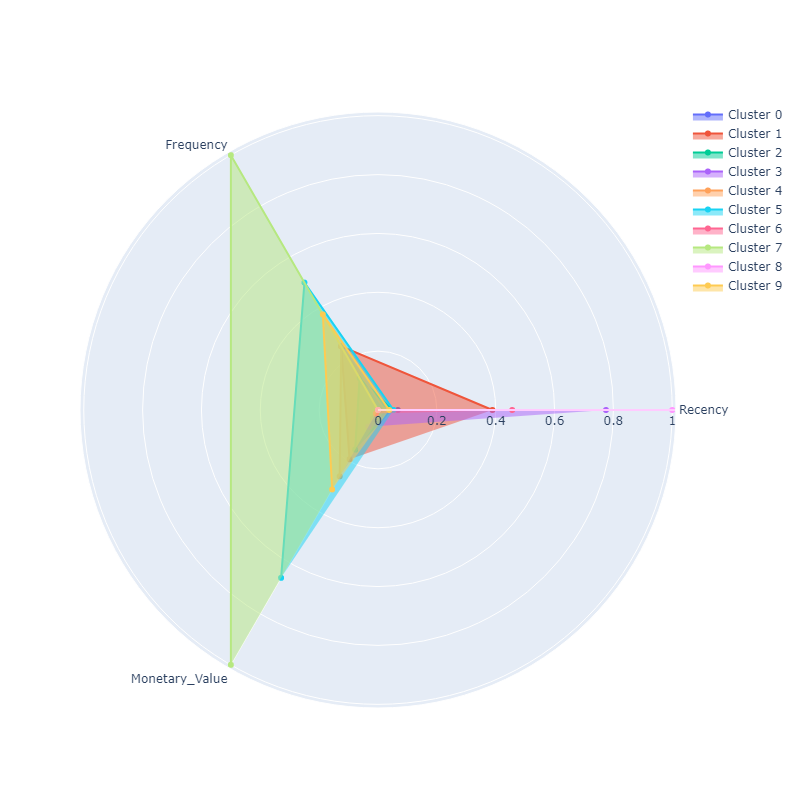

In [181]:
plot_cluster_profile(grouped_data=grouped_data_agg, n_clusters=10)

Суммируя данные, полученные из таблиц и графика, мы можем сделать следующие выводы:  

- модель разделила клиентов на 10 кластеров: 0 - "дрейфующие", 1 - "зона потери", 2, 4 и 9 - "спящие", 5 - "перспективные", 3, 6, 7, 8 - "лояльные". Дополнительно 7 кластер - можно охарактеризовать как "супер лояльные" - клиенты, которые заказывают ощутимо чаще и больше прочих. 
- При этом по заданным характеристикам клиенты в кластерах распределяются не оптимально:  несколько кластеров можно объединить в один, к примеру "спящих" клиентов модель разделила на несколько групп. Так же и с лояльными клиентами. 
- как мне представляется, оптимальное кол-во кластеров в диапазоне 6-8.  
Разделение не оптимально, поэтому проверим и ЕМ-алгоритм

In [182]:
rfm_table_em = rfm_table.copy()
rfm_table_em['clusters'] = predictions
rfm_table_em

,Recency,Frequency,Monetary_Value,clusters
CustomerID,,,,
12347,3,7,4310.00,6
12348,76,4,1437.24,0
12349,19,1,1457.55,8
12350,311,1,294.40,4
12352,37,7,1385.74,6
...,...,...,...,...
18278,74,1,173.90,3
18280,278,1,180.60,4
18281,181,1,80.82,2


In [183]:
# c tsne и ЕМ-алгоритмом
grouped_data_em = rfm_table_em.groupby('clusters')[['Recency', 'Frequency', 'Monetary_Value']].mean().round()
print(grouped_data_em)
print(rfm_table_em['clusters'].value_counts().sort_index())

          Recency  Frequency  Monetary_Value
clusters                                    
0            38.0        4.0          1209.0
1           173.0        3.0           829.0
2           180.0        1.0           291.0
3            47.0        1.0           329.0
4           312.0        1.0           311.0
5            32.0        3.0           932.0
6            29.0        7.0          2762.0
8            36.0        2.0           584.0
clusters
0    504
1    549
2    410
3    648
4    420
5    325
6    694
8    494
Name: count, dtype: int64


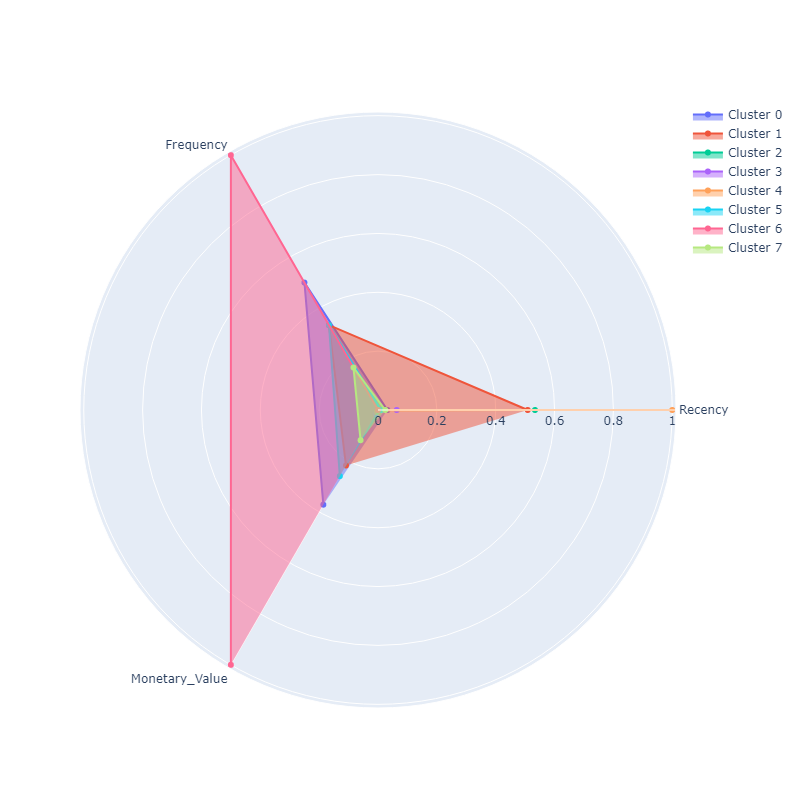

In [184]:
# в таблице получается 8 кластеров
plot_cluster_profile(grouped_data=grouped_data_em, n_clusters=8)

ЕМ-алгоритм разделил клиентов на 8 кластеров: 0, 5, 6 - "лояльные", 1 - "в зоне потери", 2,4 - "спящие", 3 - "дрейфующие", 8 - "перспективные".  ЕМ-алгоритм справился с разделением лучше, чем аггломеративный.

## 5. Выводы и оформление работы

В этой работе мы проводили разделение клиентов онлайн-магазина подарков. Чтобы провести сегментацию, мы рассмотрели 2 метода понижения размерности - PCA и t-SNE, и выбрали наиболее подходящий для нас - t-SNE. В поисках оптимального способа разделения мы проверили 3 алгоритма: Kmeans, EM-алгоритм и агломеративную иерархическую кластеризацию. Предварительно мы попытались найти оптимальные для этих алгоритмов параметры - число кластеров. Коэффициент силуэта был одинаков для ЕМ-алгоритма и иерархической кластеризации, однако на визуализации казалось, что иерархическая кластеризация лучше справляется с разделением (в отдельный кластер выделялась обособленная группа). Однако анализ сгруппированных данных и полярной диаграммы показывает, что лучше всех сработал ЕМ-алгоритм: при делении данных образовалось меньше "лишних групп".